25/10/2025 Confidence Interval Analysis by Andrei Bituleanu (solo work)

To begin my analysis of the parallel quicksort algorithm, I began by running the code once to see what search time results
I would get on a machine that uses an 8 cores processor with a base frequency of 2.90 GHz.

Initial Sanity Check (N = 1,000,000)

Sequential quicksort took: 0.341490 sec.
Parallel quicksort took: 0.525224 sec.
Builtin quicksort took: 0.473667 sec.

We do draw the conclusion that with such set-up and without any modifications to the given program, the sequential quicksort was more efficient than the parallel one. The qsort being the average of both search times.
This likely happens because of the thread management overhead and the data set is too small for parallelism to be worth using over sequence.

The next step is to run multiple repetitions, with different configurations, especially in regards to the array size to measure the average performance and determine the crossover point where parallelism becomes the better option.

My goal is to understand how the runtime of the three quicksort versions changes when the input array or the thread count changes. Basically, I want to see how the algorithms scale with the size of the data and thread numbers. I expect that for small arrays, the parallel version will be slower because of thread overhead, but for large arrays, it might become faster.

I initially ran the program with N = 5 000 000 x i ; where i is the iteration start with 1 and N being the size of the array, I didn't touch the thread numbers whatsoever and quickly realized that sequential quicksort was always better with 10 threads up until I hit astronomic numbers around 50 000 000 elements.

If parallelism only helps at 50 million elements, maybe it’s not the idea of parallelism itself that’s bad, maybe it’s the way we use it by allocating too many threads, too quickly.

Let's start running new tests, now affecting the number of threads allocated to my program.

New research direction

How does the number of threads (thread depth) affect the performance of parallel quicksort?

For this test, we will modify the defined variable THREAD_LEVEL inside the program with an incremental value of 1, 2, 4, 6, 8 and 10.
We will use the constant value of N = 10 000 000 for the array's size.

I also ran the program 5 times for each Thread Level to ensure a solid confidence interval of my results and avoid machine-oriented variations that could impact the legitimacy of my results:

In [ ]:
| Thread Level |        Sequential Times (s)       |         Parallel Times (s)        |         Built-in Times (s)        |
| :----------: | :-------------------------------: | :-------------------------------: | :-------------------------------: |
|     **1**    | 0.315, 0.347, 0.347, 0.354, 0.347 | 0.328, 0.362, 0.294, 0.368, 0.322 | 0.475, 0.466, 0.455, 0.455, 0.483 |
|     **2**    | 0.350, 0.335, 0.362, 0.340, 0.348 | 0.372, 0.312, 0.378, 0.301, 0.379 | 0.468, 0.452, 0.442, 0.485, 0.445 |
|     **4**    | 0.346, 0.343, 0.347, 0.286, 0.289 | 0.385, 0.458, 0.387, 0.434, 0.396 | 0.441, 0.454, 0.456, 0.455, 0.466 |
|     **6**    | 0.361, 0.345, 0.326, 0.347, 0.366 | 0.436, 0.502, 0.402, 0.459, 0.428 | 0.471, 0.444, 0.487, 0.465, 0.483 |
|     **8**    | 0.355, 0.311, 0.356, 0.350, 0.371 | 0.433, 0.460, 0.365, 0.472, 0.456 | 0.447, 0.448, 0.441, 0.441, 0.473 |
|    **10**    | 0.340, 0.334, 0.318, 0.281, 0.348 | 0.517, 0.480, 0.533, 0.484, 0.572 | 0.471, 0.440, 0.451, 0.441, 0.449 |


From the results, it becomes clear that regardless of the array size or the number of threads used, the sequential version consistently achieves better runtimes than the parallel one.

Let's put the data on my D3.js graph ran on an HTML page:
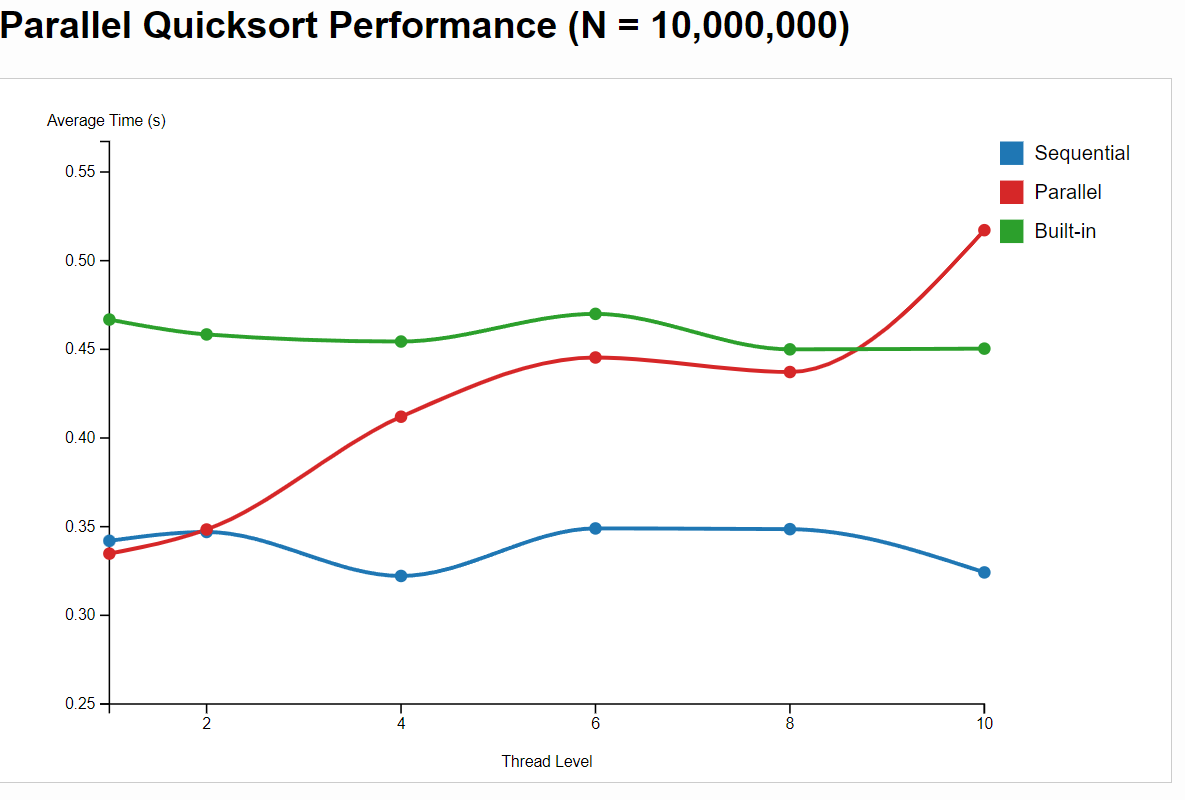

What we clearly observe is that no matter if we modify the array size or the thread level, the sequential algorithm is typically better than the parallel one.

In conclusion,

Based on the experimental results and the D3 visualization, the sequential quicksort consistently outperforms both the parallel 
and built-In implementations For an array size of 10 million elements. Increasing the number of threads leads to a steady increase In runtime, 
indicating that the cost of thread management outweighs the benefits of concurrent execution.
The parallel algorithm only performs comparably when using a single thread, and becomes slower as more threads are introduced. 
This suggests that the workload per thread is too small to compensate For synchronization and creation overhead.
Compared to other analyses where parallelism became faster For very large data sizes, this experiment confirms
that parallel execution is only beneficial when the computational workload per thread is sufficiently high. 
Without such conditions or optimization, parallel quicksort remains less efficient than its sequential counterpart.